In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv", sep = ",")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
data_description = df.describe()
data_description

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
gender_purchased = df.groupby('Gender')['Purchased'].sum()

In [9]:
gender_counts = df['Gender'].value_counts()

In [10]:
gender_counts

Gender
Female    204
Male      196
Name: count, dtype: int64

In [11]:
male_purchases = gender_purchased['Male']
female_purchased = gender_purchased['Female']


In [12]:
male_purchases


66

In [13]:
female_purchased

77

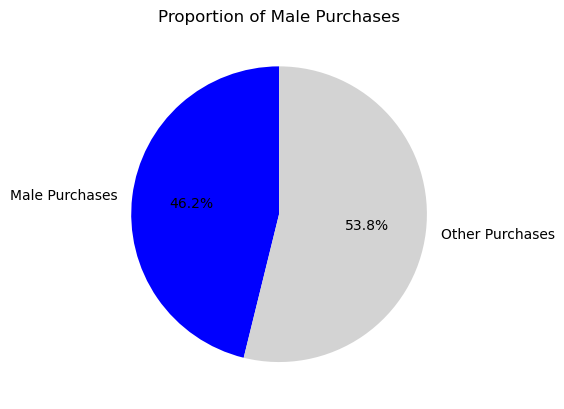

In [14]:


# Calculate total purchases
total_purchases = gender_purchased.sum()

# Extract the count of male purchases
male_purchases = gender_purchased['Male']

# Calculate the proportion of male purchases
male_purchases_proportion = male_purchases / total_purchases

# Labels for the pie chart
labels = ['Male Purchases', 'Other Purchases']

# Values for the pie chart
sizes = [male_purchases_proportion, 1 - male_purchases_proportion]

# Colors for the pie chart
colors = ['blue', 'lightgray']

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Proportion of Male Purchases')
plt.show()

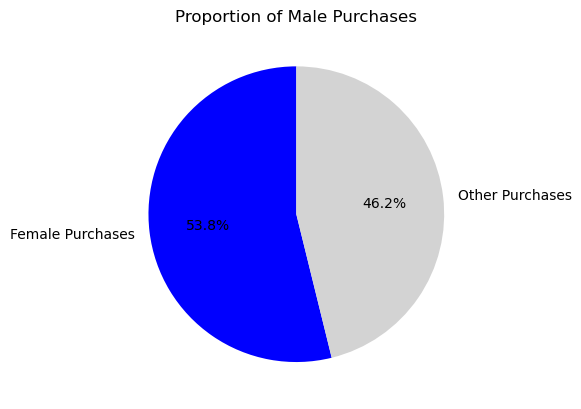

In [15]:
# Calculate total purchases
total_purchases = gender_purchased.sum()

# Extract the count of male purchases
female_purchases = gender_purchased['Female']

# Calculate the proportion of male purchases
female_purchases_proportion = female_purchases / total_purchases

# Labels for the pie chart
labels = ['Female Purchases', 'Other Purchases']

# Values for the pie chart
sizes = [female_purchases_proportion, 1 - female_purchases_proportion]

# Colors for the pie chart
colors = ['blue', 'lightgray']

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Proportion of Male Purchases')
plt.show()

In [16]:
gender_salary_purchased = df.groupby(['Gender', 'EstimatedSalary'])['Purchased'].sum().reset_index()

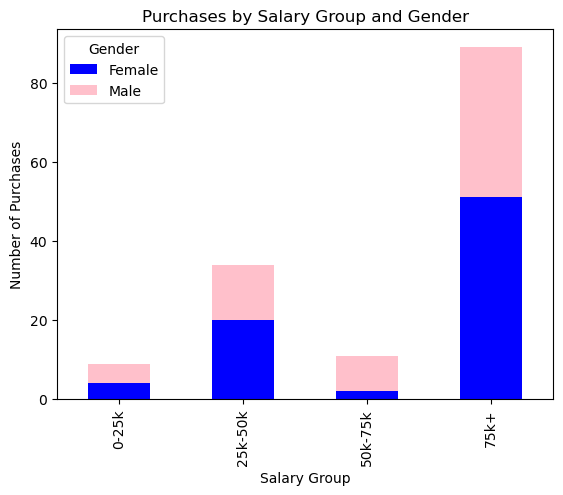

In [17]:
salary_bins = [0, 25000, 50000, 75000, float('inf')]  # You can adjust the bin edges as needed

# Define the labels for the salary bins
salary_labels = ['0-25k', '25k-50k', '50k-75k', '75k+']

# Create a new column 'SalaryGroup' based on the bins
df['SalaryGroup'] = pd.cut(df['EstimatedSalary'], bins=salary_bins, labels=salary_labels, right=False)

# Group by 'SalaryGroup' and 'Gender', and calculate the sum of 'Purchased'
grouped_data = df.groupby(['SalaryGroup', 'Gender'])['Purchased'].sum().reset_index()

# Pivot the DataFrame to have 'Gender' as columns
pivoted_data = grouped_data.pivot(index='SalaryGroup', columns='Gender', values='Purchased').fillna(0)

# Plotting a grouped bar chart
pivoted_data.plot(kind='bar', color=['blue', 'pink'], stacked=True)
plt.title('Purchases by Salary Group and Gender')
plt.xlabel('Salary Group')
plt.ylabel('Number of Purchases')
plt.show()

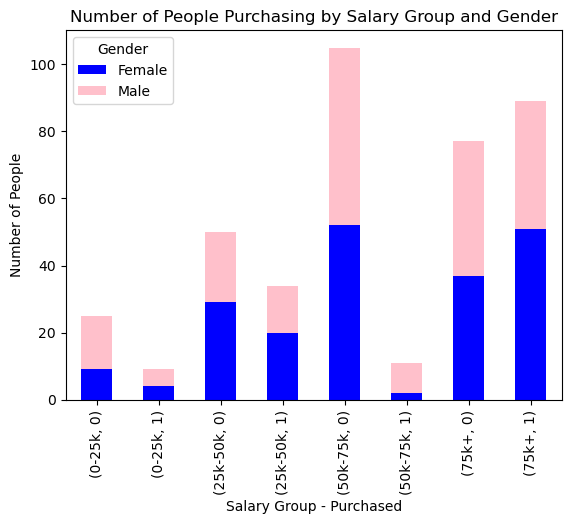

In [18]:
# Define the salary bins
salary_bins = [0, 25000, 50000, 75000, float('inf')]  # You can adjust the bin edges as needed

# Define the labels for the salary bins
salary_labels = ['0-25k', '25k-50k', '50k-75k', '75k+']

# Create a new column 'SalaryGroup' based on the bins
df['SalaryGroup'] = pd.cut(df['EstimatedSalary'], bins=salary_bins, labels=salary_labels, right=False)

# Group by 'SalaryGroup', 'Gender', and 'Purchased', and count the number of people
grouped_data = df.groupby(['SalaryGroup', 'Gender', 'Purchased']).size().reset_index(name='Count')

# Pivot the DataFrame to have 'Gender' as columns
pivoted_data = grouped_data.pivot_table(index=['SalaryGroup', 'Purchased'], columns='Gender', values='Count', fill_value=0)

# Plotting a grouped bar chart
pivoted_data.plot(kind='bar', color=['blue', 'pink'], stacked=True)
plt.title('Number of People Purchasing by Salary Group and Gender')
plt.xlabel('Salary Group - Purchased')
plt.ylabel('Number of People')
plt.show()

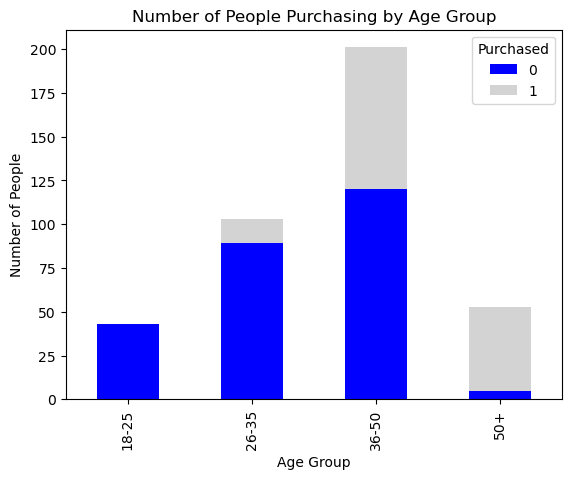

In [19]:
# Define the age bins
age_bins = [18, 25, 35, 50, float('inf')]  # You can adjust the bin edges as needed

# Define the labels for the age bins
age_labels = ['18-25', '26-35', '36-50', '50+']

# Create a new column 'AgeGroup' based on the bins
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by 'AgeGroup' and 'Purchased', and count the number of people
grouped_data_age = df.groupby(['AgeGroup', 'Purchased']).size().reset_index(name='Count')

# Pivot the DataFrame to have 'Purchased' as columns
pivoted_data_age = grouped_data_age.pivot_table(index='AgeGroup', columns='Purchased', values='Count', fill_value=0)

# Plotting a grouped bar chart
pivoted_data_age.plot(kind='bar', color=['blue', 'lightgray'], stacked=True)
plt.title('Number of People Purchasing by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.show()

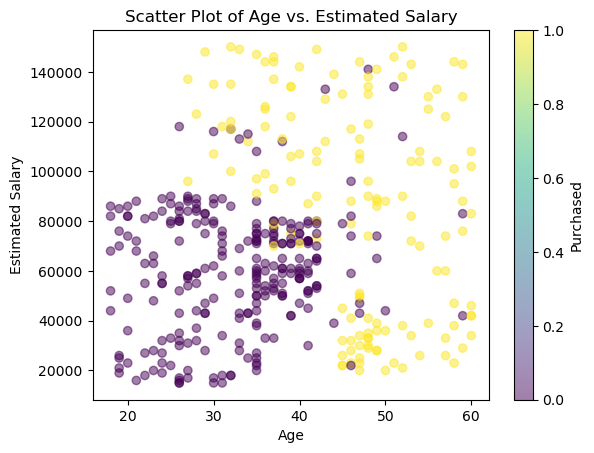

In [20]:
plt.scatter(df['Age'], df['EstimatedSalary'], c=df['Purchased'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Purchased')
plt.title('Scatter Plot of Age vs. Estimated Salary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

C:\Users\ACER\OneDrive\shubhml\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


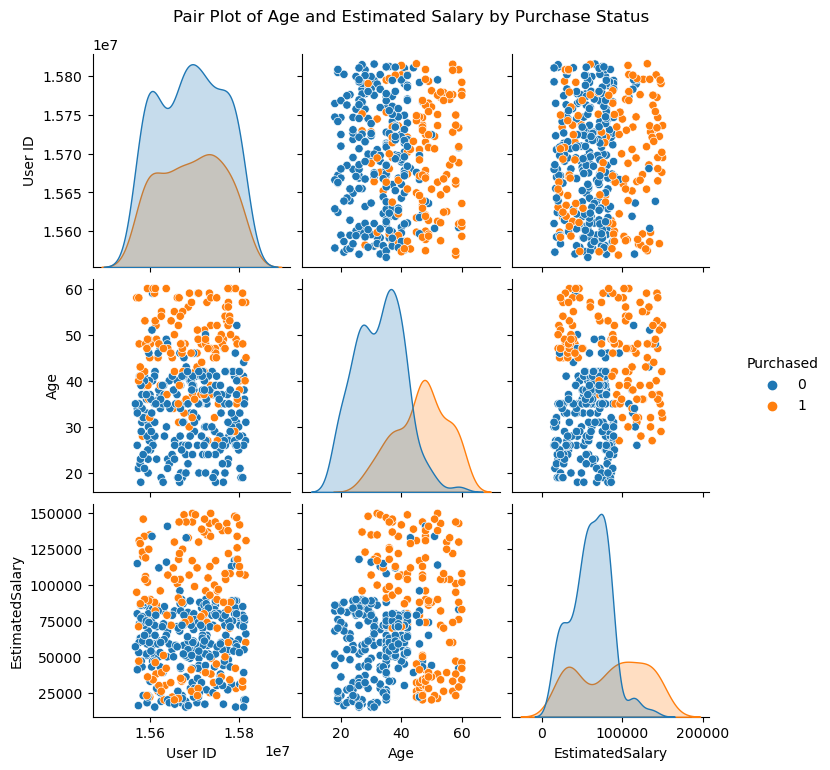

In [21]:
sns.pairplot(df, hue='Purchased')
plt.suptitle('Pair Plot of Age and Estimated Salary by Purchase Status', y=1.02)
plt.show()

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Replace 'X' and 'y' with your actual feature matrix and target variable
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Define a dictionary of classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=62),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    print(f"Training and evaluating {name}...")
    
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = classifier.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Display other evaluation metrics
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    print("="*40)  # Separation between models

Training and evaluating Decision Tree...
Accuracy: 0.9000
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        49
           1       1.00      0.74      0.85        31

    accuracy                           0.90        80
   macro avg       0.93      0.87      0.89        80
weighted avg       0.91      0.90      0.90        80

Confusion Matrix:
 [[49  0]
 [ 8 23]]
Training and evaluating Random Forest...
Accuracy: 0.9500
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        49
           1       1.00      0.87      0.93        31

    accuracy                           0.95        80
   macro avg       0.96      0.94      0.95        80
weighted avg       0.95      0.95      0.95        80

Confusion Matrix:
 [[49  0]
 [ 4 27]]
Training and evaluating Logistic Regression...
Accuracy: 0.6125
Classification Report:
               prec

C:\Users\ACER\OneDrive\shubhml\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\OneDrive\shubhml\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\OneDrive\shubhml\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
